Current working directory: /mnt/e/Figure_files/Fig_5/Final/New folder/New folder/Final_folder/Human_data_final/S_5
Spearman's rho: 0.805, p-value: 0


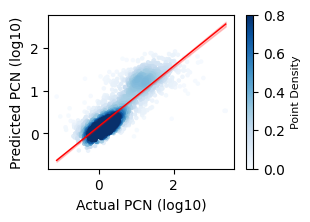

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import gaussian_kde
import statsmodels.api as sm
import os


# Load the new CSV file
df = pd.read_csv('Figure_S6_A.csv')# This is the same file obtained by the fine tuning of the second model ( Folder Figure _5 sub_folder;Model 2 )

# Extract the columns (which are now inverse-transformed) and directly take log10
x0 = df['Actual PCN']
y0 = df['Predicted PCN']

# Filter out NaN and inf values
valid_mask = ~np.isnan(x0) & ~np.isinf(x0) & ~np.isnan(y0) & ~np.isinf(y0)
x0 = x0[valid_mask]
y0 = y0[valid_mask]

# Log transform the values for visualization
XX1 = np.log10(x0)
YY1 = np.log10(y0)

# Calculate the density
xy = np.vstack([XX1, YY1])
z = gaussian_kde(xy)(xy)

# Sort the points by density so that the densest points are plotted last
idx = z.argsort()
XX1, YY1, z = XX1.iloc[idx], YY1.iloc[idx], z[idx]

# Plot the scatter plot with a different color map (change 'Blues' to any other color)
plt.figure(figsize=(3, 2))
sc = plt.scatter(XX1, YY1, c=z, marker='o', s=5, edgecolor=None, cmap='Blues', vmin=0, vmax=0.8)

# Add colorbar for point density
cb = plt.colorbar(sc)
cb.set_label('Point Density', fontsize=8)

# Perform linear regression using statsmodels
X = sm.add_constant(XX1)
model = sm.OLS(YY1, X).fit()

# Generate points for the regression line
x_fit = np.linspace(XX1.min(), XX1.max(), 100)
X_fit = sm.add_constant(x_fit)
y_fit = model.predict(X_fit)

# Calculate the confidence interval
prediction = model.get_prediction(X_fit)
ci = prediction.conf_int()

# Plot the regression line
plt.plot(x_fit, y_fit, color='red', linewidth=1)

# Plot the confidence interval
plt.fill_between(x_fit, ci[:, 0], ci[:, 1], color='red', alpha=0.2)

# Calculate and print Spearman correlation
corr, p_value = spearmanr(XX1, YY1)
print(f"Spearman's rho: {corr:.3f}, p-value: {p_value:.3g}")

# Labeling and saving the plot
plt.xlabel('Actual PCN (log10)')
plt.ylabel('Predicted PCN (log10)')
plt.savefig('FigS6_A.pdf', bbox_inches='tight')
plt.show()
